In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# from sklearn.metrics import mean_squared_errorkj

Using TensorFlow backend.


In [0]:
#usecol Return a subset of the columns. 
#, skipfooter=3)
dataset = pd.read_csv('international-airline-passengers.csv',usecols=[1])                

In [0]:
np.shape(dataset)

(144, 1)

In [0]:
dataset.head()

,totals_monthly
0,112
1,118
2,132
3,129
4,121


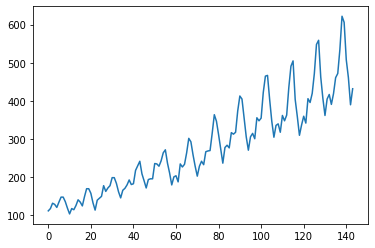

In [0]:
plt.plot(dataset)
plt.show()

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [0]:
dataset[:10,:]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753]])

In [0]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


For example, given the current time (t) we want to predict the value at the next time in the sequence (t+1), we can use the current time (t), as well as the two prior times (t-1 and t-2) as input variables.

When phrased as a regression problem, the input variables are t-2, t-1, t and the output variable is t+1.


In [0]:
np.shape(train)

(96, 1)

In [0]:
lag=3
if lag==1:
    trainX=train[:-1]
    trainY=train[1:]
    testX=test[:-1]
    testY=test[1:]
   
elif lag==3:
    trainX1=train[:-3,:]
    trainX2=train[1:-2,:]
    trainX3=train[2:-1,:]
    trainY=train[3:,:]
    #-----------------
    testX1=test[:-3,:]
    testX2=test[1:-2,:]
    testX3=test[2:-1,:]

    testY=test[3:,:]
    trainX=np.hstack((trainX1,trainX2,trainX3))
    testX=np.hstack((testX1,testX2,testX3)) 

In [0]:
np.shape(trainX)

(93, 3)

In [0]:
np.shape(trainY)

(93, 1)

In [0]:
trainX[:10,:]

array([[0.01544402, 0.02702703, 0.05405405],
       [0.02702703, 0.05405405, 0.04826255],
       [0.05405405, 0.04826255, 0.03281853],
       [0.04826255, 0.03281853, 0.05984556],
       [0.03281853, 0.05984556, 0.08494208],
       [0.05984556, 0.08494208, 0.08494208],
       [0.08494208, 0.08494208, 0.06177606],
       [0.08494208, 0.06177606, 0.02895753],
       [0.06177606, 0.02895753, 0.        ],
       [0.02895753, 0.        , 0.02702703]])

In [0]:
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1],1))
testX = testX.reshape((testX.shape[0], testX.shape[1],1)) 

In [0]:
np.shape(trainX)

(93, 3, 1)

Data is now ready to be used as input (X) to the LSTM with an input_shape of (second, third).

In [0]:
model = Sequential()
model.add(LSTM(50, input_shape=(np.shape(trainX[1,:]))))
model.add(Dense(1))

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY[:,0], epochs=100, batch_size=1, verbose=0)

In [0]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [0]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

In [0]:
np.shap(trainPredict)

(93, 1)

In [0]:
np.shape(trainY)

(93, 1)

In [0]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 21.92 RMSE
Test Score: 69.03 RMSE


In [0]:
np.shape(dataset)

(144, 1)

In [0]:
np.shape(testPredict)

(45, 1)

In [0]:
np.shape(trainPredict)

(93, 1)

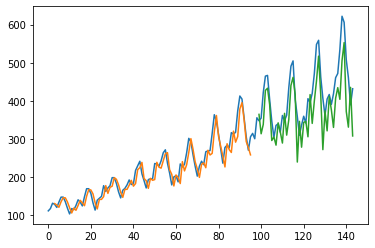

In [0]:
# shift test predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[3:len(trainPredict)+3, :] = trainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lag*2):len(dataset), :] = testPredict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()